In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import scipy.stats as ss
from pandas_datareader import DataReader
from datetime import datetime

# Make plots larger
plt.rcParams['figure.figsize'] = (15, 9)

In [2]:
facebook = DataReader('FB',  'yahoo', datetime(2016,4,1), datetime(2019,9,1));
facebook.reset_index(inplace=True,drop=False)
facebook.set_index('Date')
facebook.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2016-03-31,115.010002,113.769997,114.699997,114.099998,21207500,114.099998
1,2016-04-01,116.169998,113.349998,113.750000,116.059998,24760500,116.059998
2,2016-04-04,114.550003,111.610001,114.070000,112.550003,48487900,112.550003
3,2016-04-05,113.320000,111.900002,112.110001,112.220001,22962400,112.220001
4,2016-04-06,113.809998,112.419998,112.470001,113.709999,20814600,113.709999


In [4]:
facebook['OpenClose']= (facebook['Open']+ facebook['Close'])/2
facebook['HighLow'] = (facebook['High']+ facebook['Low'])/2

In [10]:
    ADS = pd.read_excel('/content/ADS_Index_Most_Current.xlsx')
    #Change name and format of date-column
    ADS = ADS.rename(columns={'Unnamed: 0': 'Date'})
    ADS['Date'] = pd.to_datetime(ADS['Date'],  format = "%Y%m%d")
    ADS.index = ADS['Date']
    ADS.drop(ADS.columns[0], axis=1,inplace=False)

    #Drop Days in YYYY-MM-DD
    ADS.index = ADS.index.map(lambda x: x.strftime('%Y-%m-%d'))

    #Time Slice
    ADS.tail()
    ADS = ADS.loc['2016-04-01':'2019-09-01']
    ADS.index.rename('Unnamed: 0',inplace=True)
    #print(ADS)
    
    FF3 = pd.read_csv('/content/F-F_Research_Data_Factors_daily.CSV',skiprows=4)
    
    T = FF3.shape[0]
    #print(T)

    #Drop last row of data - String
    FF3 = FF3[:T-2]

    #Convert YYYYMM into Date
    FF3['Unnamed: 0'] = pd.to_datetime(FF3['Unnamed: 0'],  format = "%Y%m%d")
    FF3.index = FF3['Unnamed: 0']
    FF3.drop(FF3.columns[0], axis=1,inplace=False)

    #Drop Days in YYYY-MM-DD
    FF3.index = FF3.index.map(lambda x: x.strftime('%Y-%m-%d'))

    FF3.tail()
    
    #Time Slice
    FF3 = FF3.loc['2016-04-01':'2019-09-01']
    FF3 = FF3.rename(columns={'Unnamed: 0': 'Date'})
    # print(FF3)
    FB = DataReader('FB',  'yahoo', datetime(2016,4,1), datetime(2019,9,1));
    FB.reset_index(inplace=True,drop=False)
    FB.set_index('Date')
    FB['Date'].dtype
    FB['Date'] = pd.to_datetime(FB['Date'],  format = "%Y%m%d")
    FB.index = FB['Date']
    FB.drop(FB.columns[0], axis=1,inplace=False)

    #Drop Days in YYYY-MM-DD
    FB.index = FB.index.map(lambda x: x.strftime('%Y-%m-%d'))

    FB.tail()
    FB = FB.loc['2016-04-01':'2019-09-01']
    FB.index.rename('Unnamed: 0',inplace=True)
    # print(FB)
    T = FF3.shape[0]
    
    #Merge three data
    temp = pd.merge(FB,FF3)
    new_Data = pd.merge(temp,ADS)
    print(new_Data)
    new_Data['open_tmr'] = new_Data['Open'].shift(-1)
    #Use yesterday's ADS-index, FF3, Close-price to predict today's Open-price
    
    Y = new_Data[['open_tmr']].values[:-1]
    X = new_Data[['Mkt-RF','SMB','HML','Close','ADS_Index']].values[1:]
    N = X.shape
    #print(N,'+',Y.shape)
    #print(Y)
    new_Data.head()
    #temp.head()

          Date        High         Low  ...   HML     RF  ADS_Index
0   2016-04-01  116.169998  113.349998  ... -0.62  0.000  -0.597141
1   2016-04-04  114.550003  111.610001  ... -0.74  0.000  -0.572479
2   2016-04-05  113.320000  111.900002  ... -0.36  0.000  -0.565193
3   2016-04-06  113.809998  112.419998  ... -0.82  0.000  -0.558550
4   2016-04-07  114.889999  113.070000  ... -0.35  0.000  -0.552552
..         ...         ...         ...  ...   ...    ...        ...
856 2019-08-26  180.500000  178.240005  ... -0.21  0.007  -0.004019
857 2019-08-27  184.039993  181.009995  ... -0.68  0.007  -0.014407
858 2019-08-28  181.949997  178.919998  ...  0.62  0.007  -0.025766
859 2019-08-29  186.080002  183.470001  ...  0.34  0.007  -0.038098
860 2019-08-30  186.800003  183.460007  ...  0.26  0.007  -0.051404

[861 rows x 12 columns]


,Date,High,Low,Open,Close,Volume,Adj Close,Mkt-RF,SMB,HML,RF,ADS_Index,open_tmr
0,2016-04-01,116.169998,113.349998,113.750000,116.059998,24760500,116.059998,0.64,-0.25,-0.62,0.0,-0.597141,114.070000
1,2016-04-04,114.550003,111.610001,114.070000,112.550003,48487900,112.550003,-0.41,-0.25,-0.74,0.0,-0.572479,112.110001
2,2016-04-05,113.320000,111.900002,112.110001,112.220001,22962400,112.220001,-0.94,-0.08,-0.36,0.0,-0.565193,112.470001
3,2016-04-06,113.809998,112.419998,112.470001,113.709999,20814600,113.709999,1.14,0.17,-0.82,0.0,-0.558550,113.790001
4,2016-04-07,114.889999,113.070000,113.790001,113.639999,20714500,113.639999,-1.23,-0.05,-0.35,0.0,-0.552552,114.250000


In [11]:
def fama(X,Y):
    T = FF3.shape[0]
    N = X.shape
    'OLS REGRESSION STARTS'
    'LINEAR REGRESSION of Y: T x 1 on'
    'Regressors X: T x N'
    invXX = np.linalg.inv(X.transpose()@X)
    #print(invXX.shape)
    'OLS_estimates for coefficents: X x 1'
    beta_hat = invXX@X.transpose()@Y

    'Predictive value of Y using OLS'
    y_hat = X@beta_hat
    'Residuals from OLS'
    residuals = Y - y_hat
    'Variance of Residuals'
    sigma2 = (1/T)*residuals.transpose()@residuals
    'standard deviation of Y or residuals'
    sigma = np.sqrt(sigma2)
    'variance-covariance matrix of beta_hat'
    varcov_beta_hat = (sigma2)*invXX
    std_beta_hat = np.sqrt(T*np.diag(varcov_beta_hat))

    'Calculate R-square'
    R_square = 1 - (residuals.transpose()@residuals)/(T*np.var(Y))
    adj_R_square = 1-(1-R_square)*(T-1)/(T-N[1])

    'Test Each Coefficient: beta_i'
    'Null Hypothesis: beta_i = 0'
    t_stat = (beta_hat.transpose()-0)/std_beta_hat
    p_val = 1-ss.norm.cdf(t_stat)

    'Test of Joint Significance of Model'
    F_stat = (beta_hat.transpose()@np.linalg.inv(varcov_beta_hat)@beta_hat/N[1])/\
    (residuals.transpose()@residuals/(T-N[1]))
    p_val_F = 1 - ss.f.cdf(F_stat,N[1]-1,T-N[1])
    
    rmse = np.sqrt(np.mean((y_hat-Y)**2))
    
    return beta_hat,y_hat


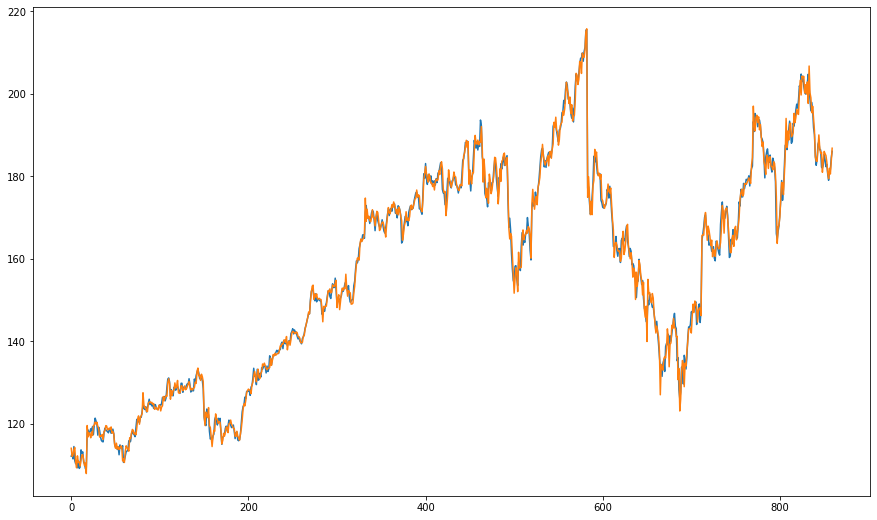

In [12]:
y_hat = fama(X,Y)[1]
plt.plot(y_hat)
plt.plot(Y)

In [13]:
def bootstrap():
    T = 250
    #print(T)
    N = X.shape[0]
    #print(N)
    
    yhat_ar1 = np.zeros(N-(T+1))
    window = 200
    num_boost = 500 # increase
    
    for t in range(T+1,N):
        X_train = new_Data[['Mkt-RF','SMB','HML','Close','ADS_Index']][t-window:t-1]
        X_train = np.column_stack([np.ones((len(X_train),1)),X_train])
        Y_train = facebook['Open'][t-window:t-1].values
       # print(X_train.shape)
       # print(Y_train.shape)
       
        X_pred = new_Data[['Mkt-RF','SMB','HML','Close','ADS_Index']][t-1:t]
        X_pred = np.column_stack([np.ones((len(X_pred),1)),X_pred])

        yhat_train = fama(X_train , Y_train)[1]
        res_train = Y_train - yhat_train
       
        y_pred_all = np.zeros(num_boost)
       
        for i in range (0,num_boost):
            err = np.random.choice(res_train,(window-1, ),replace = True)
            y_bstr = yhat_train + err
            beta_bstr = fama(X_train,y_bstr)[0]
           # print(X_pred.shape)
           # print(beta_bstr.shape)

            y_pred_bstr = X_pred@beta_bstr
            y_pred_all[i] = y_pred_bstr
           
        y_pred_ar1 = y_pred_all.mean()
       
        yhat_ar1[t-(T+1)] = y_pred_ar1
   
   
    rmse_ar1 = np.sqrt(np.mean((Y - yhat_ar1)**2))
   
    return yhat_ar1,rmse_ar1

In [14]:
rmse = bootstrap()[1]
rmse

34.29035374640737

## Professionalism
50% Minghao Ru

50% Tong Yang


## Licensing
Copyright <2020> Minghao Ru, Tong Yang

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.